In [1]:
# activate pyalcs-experiments

# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_corridor


# maze = gym.make('corridor-100-v0')
maze = gym.make('corridor-40-v0')
# maze = gym.make('corridor-20-v0')

maze.reset()
maze.render()

[..X....................................$]


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 35, 'reward': [4.791637586110138e-41, 100.0], 'population': 42, 'knowledge': 0.525, 'numerosity': 42}


INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 47, 'reward': [13.543496279680127, 102.560423991623], 'population': 57, 'knowledge': 0.6, 'numerosity': 200}


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 200, 'reward': [46.410496535173124, 47.95628283599], 'population': 57, 'knowledge': 0.6, 'numerosity': 200}


INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 200, 'reward': [20.189679689533445, 20.33336685383392], 'population': 57, 'knowledge': 0.6, 'numerosity': 200}


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 36, 'reward': [27.441026412821895, 104.53118783570679], 'population': 57, 'knowledge': 0.6, 'numerosity': 200}


INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 200, 'reward': [41.941173974647626, 24.492419644857407], 'population': 57, 'knowledge': 0.6, 'numerosity': 200}


INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 200, 'reward': [3.341162103537544, 7.908660827367597], 'population': 57, 'knowledge': 0.6, 'numerosity': 200}


INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 70, 'reward': [27.331070255553612, 118.41600793966919], 'population': 57, 'knowledge': 0.6, 'numerosity': 200}


INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 200, 'reward': [1.3926293877552958, 1.1740223583599678], 'population': 57, 'knowledge': 0.6, 'numerosity': 200}


INFO:lcs.agents.Agent:{'trial': 900, 'steps_in_trial': 200, 'reward': [31.552586336334066, 24.503442944267604], 'population': 57, 'knowledge': 0.6, 'numerosity': 200}


Cond:18 - Act:0 - Num:2 [fit: 0.647, exp: 2428.00, pred: 70.686]
Cond:18 - Act:1 - Num:4 [fit: 0.005, exp: 1740.00, pred: 64.267]
Cond:19 - Act:0 - Num:1 [fit: 0.447, exp: 1702.00, pred: 71.137]
Cond:19 - Act:1 - Num:5 [fit: 0.007, exp: 2098.00, pred: 82.512]
Cond:20 - Act:0 - Num:4 [fit: 0.691, exp: 2042.00, pred: 76.189]
Cond:21 - Act:0 - Num:4 [fit: 0.055, exp: 2894.00, pred: 117.193]
Cond:#1 - Act:1 - Num:4 [fit: 0.797, exp: 8884.00, pred: 133.250]
Cond:22 - Act:0 - Num:6 [fit: 0.734, exp: 2881.00, pred: 120.629]
Cond:22 - Act:1 - Num:3 [fit: 0.000, exp: 2378.00, pred: 103.940]
Cond:23 - Act:0 - Num:3 [fit: 0.058, exp: 2334.00, pred: 111.714]
Cond:23 - Act:1 - Num:3 [fit: 0.001, exp: 2367.00, pred: 81.806]
Cond:24 - Act:0 - Num:4 [fit: 0.246, exp: 2315.00, pred: 92.428]
Cond:24 - Act:1 - Num:4 [fit: 0.000, exp: 1753.00, pred: 69.445]
Cond:25 - Act:0 - Num:4 [fit: 0.484, exp: 1688.00, pred: 82.049]
Cond:25 - Act:1 - Num:4 [fit: 0.018, exp: 1661.00, pred: 72.690]
Cond:26 - Act:1 - Nu

(0.0, 250.0)

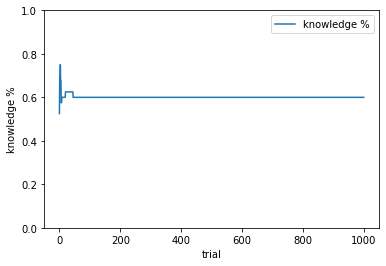

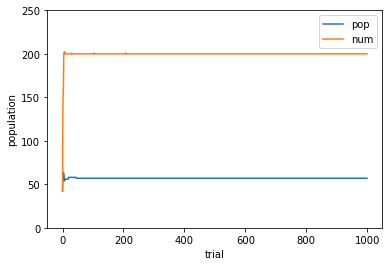

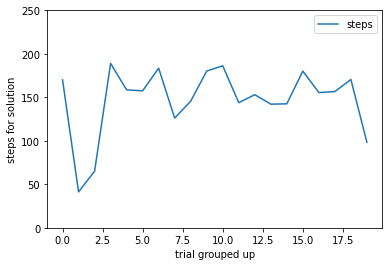

In [3]:
from lcs.agents.xcs import XCS, Configuration

# TODO: Move to utils
def xcs_corridor_knowledge(xcs: XCS, environment):
    nr_correct = 0
    position = 0
    while environment.observation_space.contains(position):
        if any([True for cl in xcs.population if cl.does_match(str(position)) and
                                                 cl.action == 1 and 
                                                 cl.wildcard_number == 0 ]):
            nr_correct += 1
        position += 1
    return nr_correct / position


def xcs_corridor_metrics(xcs: XCS, environment):
    return {
        'population': len(xcs.population),
        'knowledge': xcs_corridor_knowledge(xcs, environment),
        'numerosity': sum(cl.numerosity for cl in xcs.population)
    }


cfg = Configuration(number_of_actions=2,
                    metrics_trial_frequency=1,
                    covering_wildcard_chance=1,
                    user_metrics_collector_fcn=xcs_corridor_metrics)

agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 1000, False)

for cl in explore_population:
    print(str(cl))
print("Following is prediction Array. In case of Corridor better the last value the better")
print(explore_population.prediction_array)

import pandas as pd
import numpy as np

# TODO Merge explore and exploit

df = pd.DataFrame(metric["knowledge"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge %")
ax.legend(["knowledge %"])
ax.set_ylim(ymin=0, ymax=1)


df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])
ax.set_ylim(ymin=0, ymax=250)


xf = [metric["steps_in_trial"] for metric in explore_metrics]
temp_df = np.array_split(xf, 20)
for i in range(len(temp_df)):
    temp_df[i] = np.mean(temp_df[i]) 
df = pd.DataFrame(temp_df)
ax = df.plot()
ax.set_xlabel("trial grouped up")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])
ax.set_ylim(ymin=0, ymax=250)